#### Upload necessary packages

In [1]:
import anndata as ad
import scanpy as sc
import squidpy as sq
import pandas as pd
from scipy.io import mmread
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
from scipy.sparse import coo_matrix
import json

#### Setup cells

In [2]:
sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

scanpy==1.9.1 anndata==0.8.0 umap==0.5.1 numpy==1.23.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.3 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8
squidpy==1.2.2


#### Data Upload

In [56]:
#Uploading barcodes
barcodes =pd.read_csv('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon1/barcodes.tsv',sep='\t', header=None, index_col=0)

In [128]:
image = sq.im.ImageContainer.load('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon1/tissue_hires_image.png')

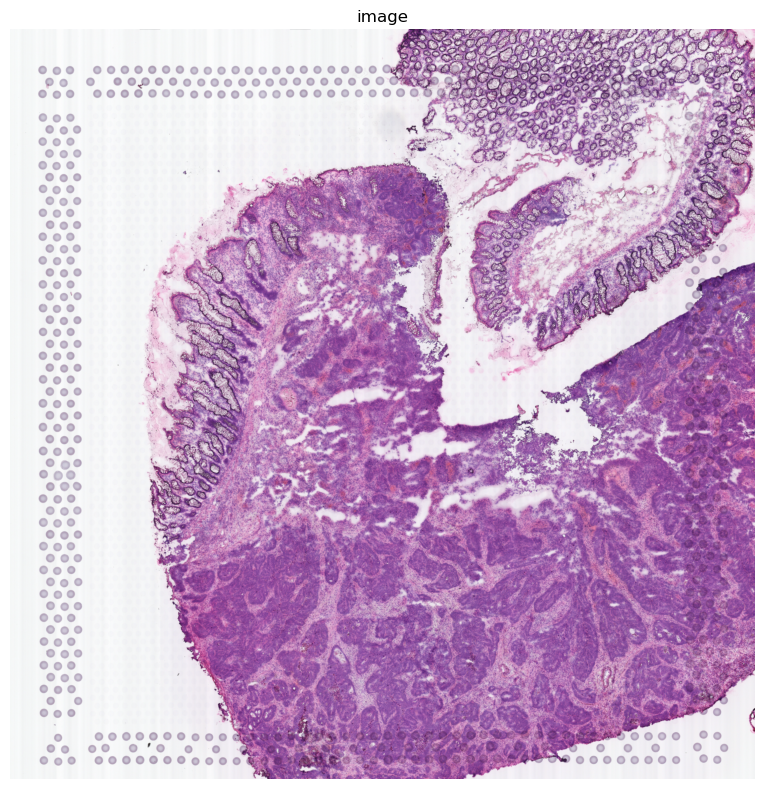

In [132]:
image.show()

In [63]:
#Uploading coordinates
coordinates =pd.read_csv('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon1/coordinates.tsv',delim_whitespace=True, index_col=0)

In [23]:
#Uploading genes
genes =pd.read_csv('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon1/genes.tsv',sep='\t', header=None)

In [69]:
#Uploading tissue position lists
tissue_positions =pd.read_csv('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon1/tissue_positions_list.csv', index_col=0)

In [7]:
#Uploading matrix
matrix = mmread('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon1/matrix.mtx')

In [79]:
matrix1 = sci.sparse.csr_matrix(matrix)

In [8]:
#Uploading filtered feature matrix
filtered_feature_bc_matrix = sc.read_10x_h5('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon1/filtered_feature_bc_matrix.h5')

/Users/annamaguza/miniforge3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [94]:
scalefactor = open('/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Spatial transcriptomics data/ST/ST-colon1/scalefactors_json.json')

In [158]:
Peng = ad.AnnData(X=np.transpose(matrix1), var=genes, obs=barcodes, obsm={"spatial": coordinates})

/var/folders/qc/2mwywtjd73z8jw_s09vv_kzm0000gn/T/ipykernel_5801/1678025701.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  Peng = ad.AnnData(X=np.transpose(matrix1), var=genes, obs=barcodes, obsm={"spatial": coordinates})
/Users/annamaguza/miniforge3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [136]:
sc.pp.normalize_total(Peng)

In [137]:
sc.pp.log1p(Peng)

In [138]:
sc.pp.pca(Peng)

In [139]:
sc.pp.neighbors(Peng)

In [140]:
sc.tl.umap(Peng)

In [141]:
sc.tl.leiden(Peng)

In [142]:
Peng

AnnData object with n_obs × n_vars = 3313 × 36601
    obs: 'leiden'
    var: 0, 1
    uns: 'spatial', 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [159]:
spatial_key = "spatial"
library_id = "tissue42"
Peng.uns[spatial_key] = {library_id: {}}
Peng.uns[spatial_key][library_id]["images"] = {}
Peng.uns[spatial_key][library_id]["images"] = {"hires": image}
Peng.uns[spatial_key][library_id]["scalefactors"] = {"spot_diameter_fullres": 130.2320992627276, "tissue_hires_scalef": 0.12207031, "fiducial_diameter_fullres": 210.37492957825225}

In [160]:
image.shape

(2000, 1985)

In [161]:
sq.pl.spatial_scatter(Peng, color="leiden", size=50)

ValueError: Unsupported key-type <class 'tuple'>

In [148]:
sq.gr.spatial_neighbors(Peng, radius=3.0)

In [153]:
sq.pl.spatial_scatter(Peng, color="leiden")

ValueError: Unsupported key-type <class 'tuple'>